In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

# Matrizzen-Multiplikation

In [ ]:
import torch
from torch import tensor

In [ ]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [ ]:
m1 = torch.randn(5,28*28)
m2 = torch.randn(784,10)

In [ ]:
%time t1=matmul(m1, m2)

CPU times: user 940 ms, sys: 0 ns, total: 940 ms
Wall time: 949 ms


In [ ]:
%timeit -n 20 t2=m1@m2

The slowest run took 6.43 times longer than the fastest. This could mean that an intermediate result is being cached.
20 loops, best of 3: 11.6 µs per loop


## Elementweise Operatoren

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a + b

tensor([12., 14.,  3.])

In [ ]:
a < b

tensor([False,  True,  True])

In [ ]:
(a < b).all(), (a==b).all()

(tensor(False), tensor(False))

In [ ]:
(a + b).mean().item()

9.666666984558105

In [ ]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [ ]:
n = tensor([[1., 2, 3], [4,5,6]])
m*n

RuntimeError: ignored

### Optimierung unserer MatMul Funktion

In [ ]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i] * b[:,j]).sum()
    return c

In [ ]:
%timeit -n 20 t3 = matmul(m1,m2)

20 loops, best of 3: 1.25 ms per loop


## Broadcasting

In [ ]:
a = tensor([10., 6, -4])
a > 0

tensor([ True,  True, False])

In [ ]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
(m - 5) / 2.73

tensor([[-1.4652, -1.0989, -0.7326],
        [-0.3663,  0.0000,  0.3663],
        [ 0.7326,  1.0989,  1.4652]])

In [ ]:
c = tensor([10.,20,30])
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c.expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [ ]:
t = c.expand_as(m)
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [ ]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [ ]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [ ]:
c = tensor([10.,20,30])
m = tensor([[1., 2, 3], [4,5,6]])
c+m

tensor([[11., 22., 33.],
        [14., 25., 36.]])

In [ ]:
c = tensor([10.,20])
m = tensor([[1., 2, 3], [4,5,6]])
c+m

RuntimeError: ignored

In [ ]:
c = tensor([10.,20,30])
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
c = c.unsqueeze(1)
m.shape,c.shape

In [ ]:
c+m

In [ ]:
t = c.expand_as(m)
t.storage()

In [ ]:
t.stride(), t.shape

In [ ]:
c = tensor([10.,20,30])
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c.shape, c[None,:].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [ ]:
%timeit -n 20 t4 = matmul(m1,m2)

20 loops, best of 3: 224 µs per loop


## Unser erster linearer Layer

In [ ]:
def lin(x, w, b): return x @ w + b

In [ ]:
# Wir simulieren 200 Input-Vektoren der Größe 100 pro Trainings-Batch
x = torch.randn(200, 100)
y = torch.randn(200)

In [ ]:
w1 = torch.randn(100,50)
b1 = torch.zeros(50)
w2 = torch.randn(50,1)
b2 = torch.zeros(1)

In [ ]:
l1 = lin(x, w1, b1)
l1.shape

torch.Size([200, 50])

In [ ]:
l1.mean(), l1.std()

(tensor(-0.0610), tensor(10.0577))

In [ ]:
x = torch.randn(200, 100)
for i in range(50): x = x @ torch.randn(100,100)
x[0:5,0:5]

tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]])

In [ ]:
x = torch.randn(200, 100)
for i in range(50): x = x @ (torch.randn(100,100) * 0.01)
x[0:5,0:5]

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

[Understanding the Difficulty of Training Deep Feedforward Neural Networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

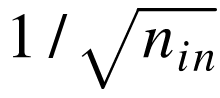

In [ ]:
x = torch.randn(200, 100)
for i in range(50): x = x @ (torch.randn(100,100) * 0.1)
x[0:5,0:5]

tensor([[-1.1653, -2.0859, -0.4624, -0.3957, -0.5566],
        [ 0.1172, -0.0840,  0.3269, -0.7882,  0.3907],
        [ 0.5581,  0.8748,  0.6427,  0.2849, -0.6254],
        [-0.7081,  0.1232,  0.5983, -1.3156,  0.0757],
        [ 0.7136, -0.5902, -0.7342,  0.4852,  0.0726]])

In [ ]:
x.std()

tensor(0.9296)

In [ ]:
x = torch.randn(200, 100)
y = torch.randn(200)

[Xavier initialization (or Glorot initialization)](https://www.kuenstliche-intelligenz-in-a-nutshell.at/2020/04/04/xavier-initialization-neural-nets.html)

In [ ]:
from math import sqrt
w1 = torch.randn(100,50) / sqrt(100)
b1 = torch.zeros(50)
w2 = torch.randn(50,1) / sqrt(50)
b2 = torch.zeros(1)

In [ ]:
l1 = lin(x, w1, b1)
l1.mean(),l1.std()

(tensor(-0.0093), tensor(0.9840))

In [ ]:
def relu(x): return x.clamp_min(0.)

In [ ]:
l2 = relu(l1)
l2.mean(),l2.std()

(tensor(0.3868), tensor(0.5715))

In [ ]:
x = torch.randn(200, 100)
for i in range(50): x = relu(x @ (torch.randn(100,100) * 0.1))
x[0:5,0:5]

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Ooops, Glorot und Bengio verwendeten `tanh` als Aktivierungsfunktion. Wir haben `ReLU` verwendet....

[Delving Deep into Rectifiers: Surpassing Human-Level Performance](https://arxiv.org/abs/1502.01852)

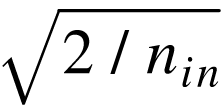

In [ ]:
x = torch.randn(200, 100)
for i in range(50): x = relu(x @ (torch.randn(100,100) * sqrt(2/100)))
x[0:5,0:5]

tensor([[0.0000, 0.0000, 0.7603, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4510, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1844, 0.0000, 0.0032],
        [0.0000, 0.0000, 0.2537, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5581, 0.0000, 0.0000]])

In [ ]:
x = torch.randn(200, 100)
y = torch.randn(200)

In [ ]:
w1 = torch.randn(100,50) * sqrt(2 / 100)
b1 = torch.zeros(50)
w2 = torch.randn(50,1) * sqrt(2 / 50)
b2 = torch.zeros(1)

In [ ]:
l1 = lin(x, w1, b1)
l2 = relu(l1)
l2.mean(), l2.std()

(tensor(0.5572), tensor(0.8151))

In [ ]:
def model(x):
    l1 = lin(x, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

In [ ]:
out = model(x)
out.shape

torch.Size([200, 1])

In [ ]:
def mse(output, targ): return (output.squeeze(-1) - targ).pow(2).mean()

In [ ]:
loss = mse(out, y)
loss

tensor(3.4513)

## Backpropagation

In [ ]:
def mse_grad(inp, targ): 
    # grad of loss with respect to output of previous layer
    inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [ ]:
def relu_grad(inp, out):
    # grad of relu with respect to input activations
    inp.g = (inp>0).float() * out.g

In [ ]:
def lin_grad(inp, out, w, b):
    # grad of matmul with respect to input
    inp.g = out.g @ w.t()
    w.g = inp.t() @ out.g
    b.g = out.g.sum(0)

In [ ]:
def forward_and_backward(inp, targ):
    # forward pass:
    l1 = inp @ w1 + b1
    l2 = relu(l1)
    out = l2 @ w2 + b2
    # we don't actually need the loss in backward!
    loss = mse(out, targ)
    
    # backward pass:
    mse_grad(out, targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

## Anpassung unseres Modells

In [ ]:
class Relu():
    def __call__(self, inp):
        self.inp = inp
        self.out = inp.clamp_min(0.)
        return self.out
    
    def backward(self): self.inp.g = (self.inp>0).float() * self.out.g

In [ ]:
class Lin():
    def __init__(self, w, b): self.w,self.b = w,b
        
    def __call__(self, inp):
        self.inp = inp
        self.out = inp@self.w + self.b
        return self.out
    
    def backward(self):
        self.inp.g = self.out.g @ self.w.t()
        self.w.g = self.inp.t() @ self.out.g
        self.b.g = self.out.g.sum(0)

In [ ]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        x = (self.inp.squeeze()-self.targ).unsqueeze(-1)
        self.inp.g = 2.*x/self.targ.shape[0]

In [ ]:
class Model():
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers): l.backward()

In [ ]:
model = Model(w1, b1, w2, b2)

In [ ]:
loss = model(x, y)

In [ ]:
model.backward()

## Brückenschlag zu PyTorch

In [ ]:
class LayerFunction():
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*args)
        return self.out
    
    def forward(self):  raise Exception('not implemented')
    def bwd(self):      raise Exception('not implemented')
    def backward(self): self.bwd(self.out, *self.args)

In [ ]:
class Relu(LayerFunction):
    def forward(self, inp): return inp.clamp_min(0.)
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [ ]:
class Lin(LayerFunction):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = inp.t() @ self.out.g
        self.b.g = out.g.sum(0)

In [ ]:
class Mse(LayerFunction):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): 
        inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [ ]:
# autograd-Funktion
from torch.autograd import Function

class MyRelu(Function):
    @staticmethod
    def forward(ctx, i):
        result = i.clamp_min(0.)
        ctx.save_for_backward(i)
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        i, = ctx.saved_tensors
        return grad_output * (i>0).float()

In [ ]:
import torch.nn as nn

class LinearLayer(nn.Module):
    def __init__(self, n_in, n_out):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(n_out, n_in) * sqrt(2/n_in))
        self.bias = nn.Parameter(torch.zeros(n_out))
    
    def forward(self, x): return x @ self.weight.t() + self.bias

In [ ]:
lin = LinearLayer(10,2)
p1,p2 = lin.parameters()
p1.shape,p2.shape

(torch.Size([2, 10]), torch.Size([2]))

In [ ]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out))
        self.loss = mse
        
    def forward(self, x, targ): return self.loss(self.layers(x).squeeze(), targ)

In [ ]:
# Module aus dem fastai Framework
class Model(Module):
    def __init__(self, n_in, nh, n_out):
        self.layers = nn.Sequential(
            nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out))
        self.loss = mse
        
    def forward(self, x, targ): return self.loss(self.layers(x).squeeze(), targ)